In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# For reproducibility
np.random.seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
# Here we need to set up our x and y
# y_train = utils.to_categorical(y_train)
# y_test = utils.to_categorical(y_test)

X = np.load('./batch_0_main_tile_array_array_upto_batch{i}.npy')
y = pd.read_csv('./batch_0_diagnosis_df_saved_upto_batch{i}.csv')

In [3]:
X

array([[[[ 44,  23,  66],
         [ 43,  21,  63],
         [ 43,  18,  61],
         ...,
         [105,  60, 123],
         [102,  59, 118],
         [ 95,  54, 108]],

        [[ 38,  21,  65],
         [ 39,  21,  63],
         [ 42,  21,  62],
         ...,
         [ 95,  53, 118],
         [ 95,  53, 114],
         [ 93,  51, 105]],

        [[ 34,  19,  66],
         [ 37,  20,  65],
         [ 41,  21,  66],
         ...,
         [ 75,  42, 103],
         [ 80,  46, 105],
         [ 85,  49, 105]],

        ...,

        [[201, 149, 185],
         [198, 150, 187],
         [177, 135, 179],
         ...,
         [ 96,  57, 120],
         [ 96,  60, 113],
         [ 84,  53, 106]],

        [[200, 139, 175],
         [193, 142, 177],
         [174, 132, 172],
         ...,
         [114,  75, 138],
         [119,  69, 134],
         [118,  60, 129]],

        [[176, 122, 173],
         [169, 122, 174],
         [157, 114, 171],
         ...,
         [131,  88, 138],
        

In [4]:
len(X)

4800

In [5]:
len(y)

1200

In [6]:
y.drop(columns='diagnosis', inplace=True)


In [7]:
y['Diagnosis'].value_counts(normalize=True)

Mixed glioma                     0.583333
Oligodendroglioma, anaplastic    0.416667
Name: Diagnosis, dtype: float64

In [8]:
y = (y['Diagnosis'] == 'Mixed glioma').astype(int)

In [9]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1195    0
1196    0
1197    0
1198    0
1199    0
Name: Diagnosis, Length: 1200, dtype: int64

In [10]:
y = y.to_numpy()

In [11]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
y = utils.to_categorical(y, 2)

In [13]:
X_model, X_holdout, y_model, y_holdout = train_test_split(X[:1200], y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model)

In [15]:
# Make sure each value is a float. (Otherwise, we get an error.)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_holdout = X_holdout.astype('float32')

# The current range of X_train and X_test is 0 to 255.
# The code below is equivalent to X_train = X_train / 255.
# This scales each value to be between 0 and 1.
X_train /= 255
X_test /= 255
X_holdout /= 255

In [16]:
y_test

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [17]:
X_train[1].shape

(256, 256, 3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 6)       168       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      1760      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 123008)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

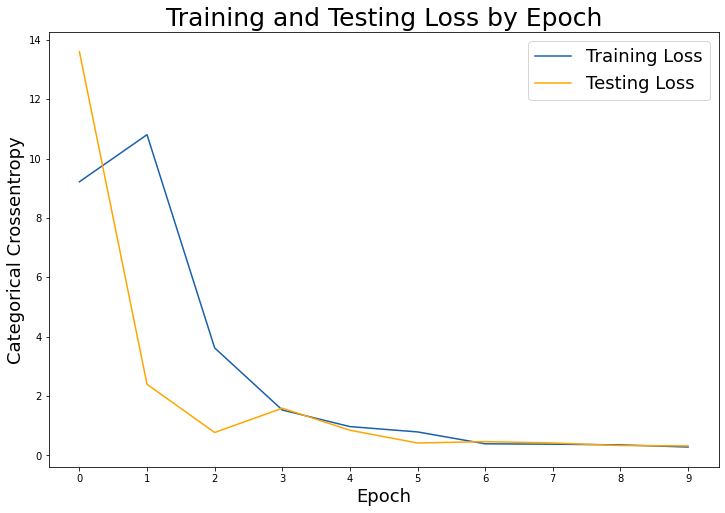

In [18]:
cnn_model = Sequential()

cnn_model.add(Conv2D(
        filters = 6, # number of filters
        kernel_size = (3,3), # height/width of filter
        activation = 'relu',
        input_shape = (256, 256, 3)))


cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(32,
                     kernel_size=(3,3),
                     activation= 'relu'
                    ))

cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Dropout(0.05))

# cnn_model.add(Conv2D(32,
#                      kernel_size=(3,3),
#                      activation= 'relu'
#                     ))

# cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# cnn_model.add(Dropout(0.05))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))

cnn_model.add(Dense(2, activation='softmax'))

cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
cnn_model.summary()
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=256,
                        validation_data=(X_test, y_test),
                        epochs=10,
                        verbose=1)



# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(np.arange(10), np.arange(10))

plt.legend(fontsize = 18);

In [19]:
ypreds = cnn_model.predict_classes(X_holdout)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [20]:
ypreds

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0])

In [21]:
y_holdout_true = np.argmax(y_holdout, axis=1, out=None)

In [22]:
y_holdout_true

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0])

In [23]:
roc_auc_score(y_holdout_true, ypreds)

0.83128078817734

In [ ]:
numpy.argmax(a, axis=None, out=None)
